In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
%pwd

'/home/ardigen/Documents/bertrand/bertrand/notebooks'

In [6]:
# bertrand_results_mask = pd.read_csv('../../results/bertrand_with_outliers_filtering.csv')
# bertrand_results_mask = pd.read_csv(
#     "/mnt/storage2/olek/bertrand-rep3/training-immunesim-big/results.csv"
# )
bertrand_results_mask = pd.read_csv(
    "/mnt/storage2/olek/bertrand-rep3/training-dean/results_ap.csv"
)
# bertrand_results_nomask = pd.read_csv("/mnt/storage2/olek/bertrand-rep3/training-immunesim-big-nooutliers/results.csv")
bertrand_results_nomask = pd.read_csv("/mnt/storage2/olek/bertrand-rep3/training-dean-nooutliers/results_ap.csv")

In [7]:
bertrand_results_mask.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,test
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,test
2,0.532850,0.320306,266,FRCPRRFCF,42,dataset_42,test
3,0.558673,0.443439,28,GLNKIVRMY,42,dataset_42,test
4,0.587313,0.402589,66,GPGHKARVL,42,dataset_42,test


In [8]:
bertrand_results_mask["mask"] = True
bertrand_results_nomask["mask"] = False

bertrand_results_df = pd.concat([bertrand_results_mask, bertrand_results_nomask])

In [9]:
bertrand_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,test,True
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,test,True
2,0.532850,0.320306,266,FRCPRRFCF,42,dataset_42,test,True
3,0.558673,0.443439,28,GLNKIVRMY,42,dataset_42,test,True
4,0.587313,0.402589,66,GPGHKARVL,42,dataset_42,test,True


In [10]:
nettcr_results_df = pd.read_csv("/mnt/ardisk/local_projects/olek/nettcr2/nettcr2.csv")
ergo_results_df = pd.read_csv("/mnt/ardisk/local_projects/olek/ERGO/ergo2.csv")

titan_results_df_mask = pd.read_csv("../../results/titan.csv")
titan_results_df_mask["mask"] = True

titan_results_df_nomask = pd.read_csv("../../results/titan_nomask.csv")
titan_results_df_nomask["mask"] = False

titan_results_df = pd.concat([titan_results_df_mask, titan_results_df_nomask]).reset_index(drop=True)

dlptcr_results_df_mask = pd.read_csv("../../results/dlptcr.csv")
dlptcr_results_df_mask["mask"] = True

dlptcr_results_df_nomask = pd.read_csv("../../results/dlptcr_nomask.csv")
dlptcr_results_df_nomask["mask"] = False

dlptcr_results_df = pd.concat([dlptcr_results_df_mask, dlptcr_results_df_nomask]).reset_index(drop=True)

nettcr_results_df = nettcr_results_df.rename(columns={"ds_seed": "dataset", "set": "subset"})
nettcr_results_df.dataset = "dataset_" + nettcr_results_df.dataset.astype(str)
nettcr_results_df.n = nettcr_results_df.n.astype(int)

ergo_results_df = ergo_results_df.rename(columns={"ds_seed": "dataset", "set": "subset"})
ergo_results_df.dataset = "dataset_" + ergo_results_df.dataset.astype(str)
ergo_results_df.n = ergo_results_df.n.astype(int)
ergo_results_df['mask'] = ergo_results_df['mask'].map({'F': False, 'T': True})

In [19]:
ergo_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,mask,subset
0,0.471301,0.191581,244,CTELKLSDY,42,dataset_42,False,test
1,0.526488,0.296646,886,EIYKRWII,42,dataset_42,False,test
2,0.590462,0.240913,1330,FRCPRRFCF,42,dataset_42,False,test
3,0.600000,0.266667,12,GEIYKRWII,42,dataset_42,False,test
4,0.656535,0.382368,783,IPSINVHHY,42,dataset_42,False,test


In [20]:
titan_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask
0,0.525862,0.297412,48,CTELKLSDY,42,dataset_42,test,True
1,0.511957,0.281985,30,FLRGRAYGL,42,dataset_42,test,True
2,0.486597,0.241216,266,FRCPRRFCF,42,dataset_42,test,True
3,0.595663,0.392634,28,GLNKIVRMY,42,dataset_42,test,True
4,0.558999,0.273886,66,GPGHKARVL,42,dataset_42,test,True


In [21]:
for dataset in ["dataset_42", "dataset_43", "dataset_44"]:
    for cv_seed in range(42, 63):
        for mask in [True, False]:
            for subset in ["test", "cancer"]:
                r1 = bertrand_results_df[
                    (bertrand_results_df.dataset == dataset)
                    & (bertrand_results_df.cv_seed == cv_seed)
                    & (bertrand_results_df["mask"] == mask)
                    & (bertrand_results_df["subset"] == subset)
                ]

                r2 = nettcr_results_df[
                    (nettcr_results_df.dataset == dataset)
                    & (nettcr_results_df.cv_seed == cv_seed)
                    & (nettcr_results_df["mask"] == mask)
                    & (nettcr_results_df["subset"] == subset)
                ]
                r3 = ergo_results_df[
                    (ergo_results_df.dataset == dataset)
                    & (ergo_results_df.cv_seed == cv_seed)
                    & (ergo_results_df["mask"] == mask)
                    & (ergo_results_df["subset"] == subset)
                ]
            if (
                len(r1) != len(r2)
                or len(r1) != len(r3)
                or (np.unique(r1.peptide) != np.unique(r2.peptide)).all()
                or (np.unique(r1.peptide) != np.unique(r3.peptide)).all()
            ):
                raise Exception()

In [22]:
bertrand_results_df.loc[:, "model"] = "BERTrand"
ergo_results_df.loc[:, "model"] = "ERGO"
nettcr_results_df.loc[:, "model"] = "NetTCR2.0"
titan_results_df.loc[:, "model"] = "TITAN"
dlptcr_results_df.loc[:, "model"] = "DLpTCR"

In [23]:
results_df = pd.concat(
    [bertrand_results_df, ergo_results_df, nettcr_results_df, titan_results_df, dlptcr_results_df]
)

In [24]:
results_df.loc[:, "subset"] = results_df["subset"].map(
    {"test": "Cross validation test set", "cancer": "Independent cancer set"}
)
results_df.loc[:, "mask"] = results_df["mask"].map(
    {False: "Basic filtering", True: "Outliers filtering"}
)

In [25]:
results_df.head(2)

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask,model
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,Cross validation test set,Outliers filtering,BERTrand
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,Cross validation test set,Outliers filtering,BERTrand


In [26]:
results_df[results_df.n >= 5].groupby(["model", "subset", "mask"]).rocs.agg("mean").unstack()

mask                                 Basic filtering  Outliers filtering
model     subset                                                        
BERTrand  Cross validation test set         0.689313            0.645296
          Independent cancer set            0.725822            0.685308
DLpTCR    Cross validation test set         0.657155            0.582466
          Independent cancer set            0.670966            0.587794
ERGO      Cross validation test set         0.654468            0.577079
          Independent cancer set            0.668119            0.586522
NetTCR2.0 Cross validation test set         0.629726            0.569234
          Independent cancer set            0.645300            0.578768
TITAN     Cross validation test set         0.648307            0.581866
          Independent cancer set            0.667090            0.584327

In [27]:
results_df[results_df.n >= 5].groupby(["model", "subset", "mask"]).aps.agg("mean").unstack()

mask                                 Basic filtering  Outliers filtering
model     subset                                                        
BERTrand  Cross validation test set         0.484615            0.484328
          Independent cancer set            0.552943            0.553304
DLpTCR    Cross validation test set         0.403220            0.378487
          Independent cancer set            0.439269            0.399624
ERGO      Cross validation test set         0.430401            0.386751
          Independent cancer set            0.532804            0.469798
NetTCR2.0 Cross validation test set         0.384037            0.374438
          Independent cancer set            0.408297            0.390462
TITAN     Cross validation test set         0.397764            0.381261
          Independent cancer set            0.434645            0.396395

In [28]:
pd.set_option('display.max_rows', 500)

In [29]:
pd.crosstab(results_df['mask'] +'_'+ results_df.model, results_df.dataset+'_'+results_df.cv_seed.astype(str)).T.head(63)

row_0,Basic filtering_BERTrand,Basic filtering_DLpTCR,Basic filtering_ERGO,Basic filtering_NetTCR2.0,Basic filtering_TITAN,Outliers filtering_BERTrand,Outliers filtering_DLpTCR,Outliers filtering_ERGO,Outliers filtering_NetTCR2.0,Outliers filtering_TITAN
col_0,,,,,,,,,,
dataset_42_42,296,296,296,296,592,285,285,285,285,285
dataset_42_43,288,288,288,288,288,290,290,290,290,290
dataset_42_44,289,289,289,289,289,290,290,290,290,290
dataset_42_45,285,285,285,285,285,291,291,291,291,291
dataset_42_46,293,293,293,293,293,288,288,288,288,288
dataset_42_47,290,290,290,290,290,290,290,290,290,290
dataset_42_48,287,287,287,287,287,292,292,292,292,292
dataset_42_49,286,286,286,286,286,294,294,294,294,294
dataset_42_50,289,289,289,289,289,290,290,290,290,290


In [30]:
results_df['model'].value_counts()

TITAN        36607
BERTrand     36600
ERGO         36600
NetTCR2.0    36600
DLpTCR       36600
Name: model, dtype: int64

In [31]:
results_df_agg = (
    results_df[results_df.n >= 5]
    .groupby(["model", "subset", "mask", "dataset", "cv_seed"])
    .aps.agg(["mean", "std"])
    .reset_index()
)

In [32]:
results_df_agg.rename(columns={"mean": "ap", "std": "ap_std"}, inplace=True)

In [33]:
df_2 = pd.read_csv("/mnt/ardisk/local_projects/olek/doktor-trans/data/negatives_inx_out/rep_nomask/dataset_42.csv.gz")


<ipython-input-33-c2676bb52aec>:1: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,12,13,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,42,43,44,45,46,47,48,49,51,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("/mnt/ardisk/local_projects/olek/doktor-trans/data/negatives_inx_out/rep_nomask/dataset_42.csv.gz")


In [34]:
df_2.y.mean()

0.1992720989651306

In [36]:
# df_1.y.mean()

In [37]:
# Data for cancer peptides plot
pep_res_df = bertrand_results_df[
    (bertrand_results_df["mask"] == True)
    & (bertrand_results_df["subset"] == "cancer")
    & (bertrand_results_df["n"] >= 5)
].copy()
# Extract info about peptide clusters
df_1 = pd.read_csv("../../results/negative_decoys/datasets/dataset_42.csv.gz")
pep_to_cluster = df_1.groupby("peptide_seq").peptide_cluster.agg("first")
pep_res_df.loc[:, "peptide_cluster"] = pep_to_cluster.loc[pep_res_df.peptide].values
n_by_cluster = pep_res_df.groupby("peptide").agg("first").groupby("peptide_cluster").n.sum()
pep_res_df.loc[:, "peptide_cluster_n"] = n_by_cluster.loc[pep_res_df.peptide_cluster].values
pep_res_df.sort_values(["peptide_cluster_n", "n"], ascending=[False, False], inplace=True)
pep_res_df.loc[:, "Peptide"] = (
    pep_res_df.peptide + " (n=" + pep_res_df.n.astype(str) + ")"
)  # + pep_res_df.peptide_cluster
pep_res_df.loc[:, "AP"] = pep_res_df.aps
peptide_order = pep_res_df.groupby("peptide").n.agg("first").sort_values(ascending=False)

N = 30
pep_res_df_head = pep_res_df[pep_res_df.peptide.isin(peptide_order.head(N).index)]

pep_res_mean = pep_res_df_head.groupby("Peptide", sort=False).agg(
    {"AP": ["mean", "std"], "peptide_cluster": "first",}
)

cancer_means = pep_res_mean.AP["mean"]
cancer_stds = pep_res_mean.AP["std"]
total_mean_std = pep_res_df.groupby(["cv_seed", "dataset"]).rocs.agg(["mean", "std"]).mean(axis=0)
cancer_means.loc["TOTAL"] = total_mean_std["mean"]
cancer_stds.loc["TOTAL"] = total_mean_std["std"]

<ipython-input-37-a7c0e135a431>:8: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,12,13,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,42,43,44,45,46,47,48,49,51,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("../../results/negative_decoys/datasets/dataset_42.csv.gz")
<ipython-input-37-a7c0e135a431>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_means.loc["TOTAL"] = total_mean_std["mean"]
<ipython-input-37-a7c0e135a431>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_stds.loc["TOTAL"] = total_mean_std["std"]


In [38]:
def plot_peptides(ax):
    """
    plots per-peptide vertical barplot - subplot E
    """
    ax.barh(
        cancer_means.index[-1],
        cancer_means.iloc[-1],
        xerr=cancer_stds.iloc[-1],
        capsize=5,
        color="#53A40D",
        height=0.75,
    )
    ax.barh(
        cancer_means.index[::-1][1:],
        cancer_means[::-1][1:],
        xerr=cancer_stds[::-1][1:],
        capsize=3,
        color="#1F77B4",
        height=0.75,
    )
    ax.vlines(0.25, -1, N + 1, color="red", linestyle="--")
    ax.set_xlim(0.0, 1.0)
    ax.set_xlabel('AP')

In [39]:
def plot_benchmarks(x, y, yerr, **kwargs):
    """
    plots 1 barplot - subplots A, B, C, D
    """
    ax = plt.gca()
    data = kwargs.pop("data")
    kwargs.pop("color")
    sns.barplot(
        data=data,
        x=x,
        y=y,
        ax=ax,
        capsize=0.1,
        ci="sd",
        **kwargs,
        order=["NetTCR2.0", "ERGO", "TITAN", "DLpTCR", "BERTrand"],
        palette=["#EF553B", "#1F77B4","#FF7F0E", "#AB63FA", "#53A40D"]
    )
    auroc_mean = data.groupby("model")[y].agg("mean")
    auroc_mean = auroc_mean.reindex(["NetTCR2.0", "ERGO","TITAN", "DLpTCR", "BERTrand"])
    for i, roc in enumerate(auroc_mean):
        if np.isnan(roc):
            continue
        text = "%.2f" % roc
        ax.text(
            i, 0.3, text, color="white", fontweight="bold", fontsize=15, ha="center", va="center"
        )
#     print(data['mask'])
    if data['mask'].iloc[0] == 'Basic filtering':
        h = 0.2
    else:
        h = 0.25
    ax.hlines(h, -0.5, 4.5, color="red", linestyle="--")
    ax.set_ylim(0, 0.75)

In [40]:
results_df_agg.model.value_counts()

BERTrand     252
DLpTCR       252
ERGO         252
NetTCR2.0    252
TITAN        250
Name: model, dtype: int64

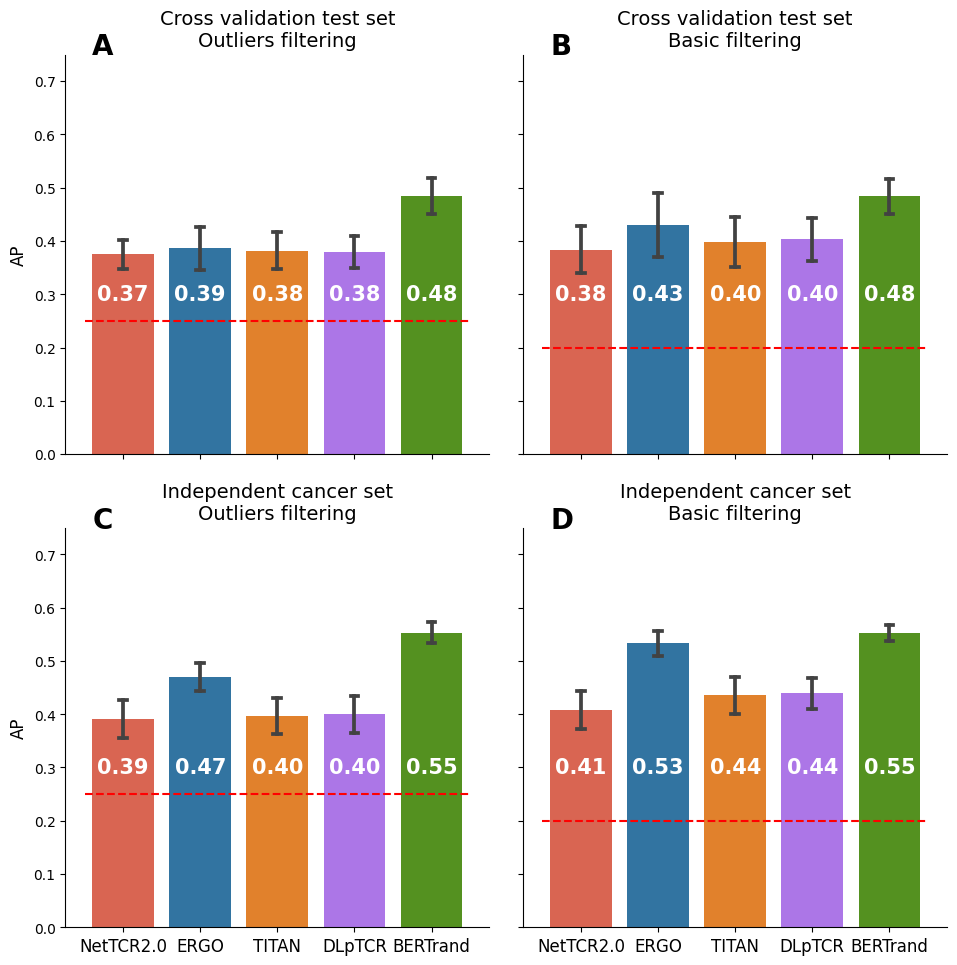

In [41]:
g = sns.FacetGrid(
    results_df_agg,
    col="mask",
    row="subset",
    col_order=["Outliers filtering", "Basic filtering"],
)
g.map_dataframe(plot_benchmarks, "model", "ap", "ap_std")

g.set_titles(template="{row_name}\n{col_name}", size=14)  # {row_name}\n{col_name}
[plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12) for ax in g.axes.flat]
[ax.set_xlabel("") for ax in g.axes.flat]
g.axes[0, 0].set_ylabel("AP", fontsize=12)
g.axes[1, 0].set_ylabel("AP", fontsize=12)


for ax, letter in zip(g.axes.flat, ["A", "B", "C", "D"]):
    ax.text(-0.4, 0.75, letter, fontweight="bold", fontsize=20)


g.fig.subplots_adjust(bottom=0.07, left=0.07, right=0.7)


# g.figure.subplots_adjust()
# ax = g.fig.add_axes([0.85, 0.07, 0.3, 0.85], label="axis1")
# ax.text(-0.1, 33.1, "E", fontweight="bold", fontsize=20)

# plot_peptides(ax)
# ax.set_title("Results for different\ncancer peptides", fontsize=14)
g.fig.set_size_inches(14, 10)
# from matplotlib.transforms import Bbox
# g.figure.savefig('comparison.png', bbox_inches="tight")

plt.savefig("comparison_ap.eps", format="eps", bbox_inches="tight")
plt.show()

In [54]:
g = sns.FacetGrid(
    results_df_agg,
    col="mask",
    row="subset",
    col_order=["Outliers filtering", "Basic filtering"],
)
g.map_dataframe(plot_benchmarks, "model", "roc", "roc_std")

g.set_titles(template="{row_name}\n{col_name}", size=14)  # {row_name}\n{col_name}
[plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12) for ax in g.axes.flat]
[ax.set_xlabel("") for ax in g.axes.flat]
g.axes[0, 0].set_ylabel("AUROC", fontsize=12)
g.axes[1, 0].set_ylabel("AUROC", fontsize=12)


for ax, letter in zip(g.axes.flat, ["A", "B", "C", "D"]):
    ax.text(-0.4, 0.75, letter, fontweight="bold", fontsize=20)


g.fig.subplots_adjust(bottom=0.07, left=0.07, right=0.7)


# g.figure.subplots_adjust()
ax = g.fig.add_axes([0.85, 0.07, 0.3, 0.85], label="axis1")
ax.text(-0.1, 33.1, "E", fontweight="bold", fontsize=20)

plot_peptides(ax)
ax.set_title("Results for different\ncancer peptides", fontsize=14)
g.fig.set_size_inches(14, 10)
# from matplotlib.transforms import Bbox
# g.figure.savefig('comparison.png', bbox_inches="tight")

plt.savefig("comparison2.eps", format="eps", bbox_inches="tight")
plt.show()

ValueError: Could not interpret input 'roc'